In [1]:
import matplotlib
import pathlib
import mne
import mne_bids
%matplotlib inline

import pandas


In [2]:
raw_fname = r'C:\Users\sathvik\MNE-sample-data\MEG\sample\sample_audvis_raw.fif'

In [3]:
raw=mne.io.read_raw(raw_fname)


Opening raw data file C:\Users\sathvik\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


In [4]:
raw.plot(verbose=True)

Using qt as 2D backend.


#### Below code gives us events data 

In [5]:
events=mne.find_events(raw)
len(events)

320 events found
Event IDs: [ 1  2  3  4  5 32]


320

In [6]:
event_id={
   'Auditory/left' :1,
    'Auditory/right':2,
    'Visual/Left':3,
    'Visual/Right':4,
    'Smiley':5,
    'Button':32
}
event_id

{'Auditory/left': 1,
 'Auditory/right': 2,
 'Visual/Left': 3,
 'Visual/Right': 4,
 'Smiley': 5,
 'Button': 32}

### Below code gives us the count of events for type 'Visual/Right' 

In [7]:
len(events[events[:,-1]==4])

71

#### Code for visual only events count 

In [8]:
len(events[events[:,-1]==4])+len(events[events[:,-1]==3])

144

#### Code for auditory only events count 

In [9]:
len(events[events[:,-1]==1])+len(events[events[:,-1]==2])

145

In [10]:
import pandas as pd
table=pd.DataFrame(columns=event_id.keys())
table.columns

Index(['Auditory/left', 'Auditory/right', 'Visual/Left', 'Visual/Right',
       'Smiley', 'Button'],
      dtype='object')

In [11]:
l1=[len(events[events[:,-1]==1]),
      len(events[events[:,-1]==2]),
      len(events[events[:,-1]==3]),
      len(events[events[:,-1]==4]),
      len(events[events[:,-1]==5]),
      len(events[events[:,-1]==32])]
table= table.append(pd.Series(l1, index=table.columns), ignore_index=True)
table

C:\Users\sathvik\AppData\Local\Temp\ipykernel_21924\2806990516.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table= table.append(pd.Series(l1, index=table.columns), ignore_index=True)


,Auditory/left,Auditory/right,Visual/Left,Visual/Right,Smiley,Button
0,72,73,73,71,15,16


In [12]:
raw.info['chs']

[{'scanno': 1,
  'logno': 113,
  'kind': 1 (FIFFV_MEG_CH),
  'range': 0.00030517578125,
  'cal': 3.1600000394149674e-09,
  'coil_type': 3012 (FIFFV_COIL_VV_PLANAR_T1),
  'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.0127    ,  0.0057    ,
         -0.99990302, -0.186801  , -0.98240298, -0.0033    , -0.98232698,
          0.18674099,  0.013541  ]),
  'unit': 201 (FIFF_UNIT_T_M),
  'unit_mul': 0 (FIFF_UNITM_NONE),
  'ch_name': 'MEG 0113',
  'coord_frame': 1 (FIFFV_COORD_DEVICE)},
 {'scanno': 2,
  'logno': 112,
  'kind': 1 (FIFFV_MEG_CH),
  'range': 0.00030517578125,
  'cal': 3.1600000394149674e-09,
  'coil_type': 3012 (FIFFV_COIL_VV_PLANAR_T1),
  'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.186801  , -0.98240298,
         -0.0033    ,  0.0127    , -0.0057    ,  0.99990302, -0.98232698,
          0.18674099,  0.013541  ]),
  'unit': 201 (FIFF_UNIT_T_M),
  'unit_mul': 0 (FIFF_UNITM_NONE),
  'ch_name': 'MEG 0112',
  'coord_frame': 1 (FIFFV_COORD_DEVICE)},
 {'scanno': 3,

In [13]:
raw.plot(events=events,event_id=event_id,event_color='red')

Waiting for Loading-Thread to finish... (max. 10 sec)
Channels marked as bad:
['MEG 2443', 'EEG 053']


In [14]:
raw.info['bads']

['MEG 2443', 'EEG 053']

#### Some data info 

In [19]:
raw.info['chs'][0]

{'scanno': 1,
 'logno': 113,
 'kind': 1 (FIFFV_MEG_CH),
 'range': 0.00030517578125,
 'cal': 3.1600000394149674e-09,
 'coil_type': 3012 (FIFFV_COIL_VV_PLANAR_T1),
 'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.0127    ,  0.0057    ,
        -0.99990302, -0.186801  , -0.98240298, -0.0033    , -0.98232698,
         0.18674099,  0.013541  ]),
 'unit': 201 (FIFF_UNIT_T_M),
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'MEG 0113',
 'coord_frame': 1 (FIFFV_COORD_DEVICE)}

In [20]:
len(raw.info['chs'])

376

#### Below code helps us to find sensors place on brain 

Using matplotlib backend: <object object at 0x000002A37D43B570>


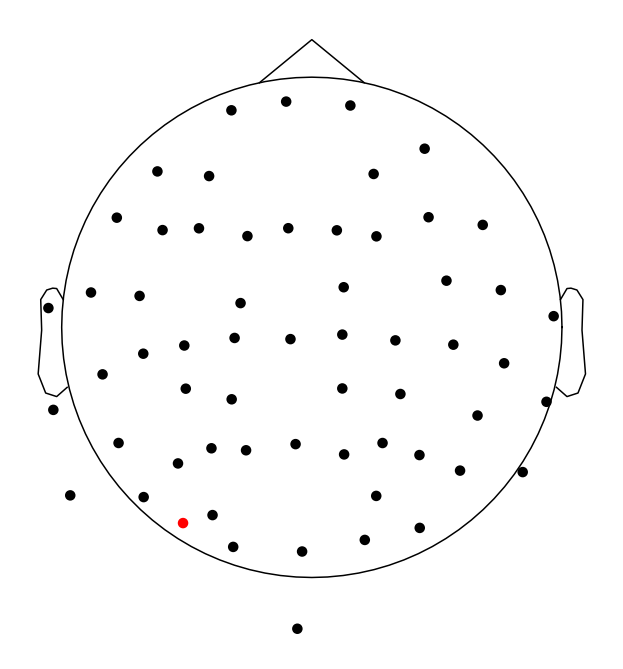

In [21]:
%matplotlib 
raw.plot_sensors(ch_type='eeg')

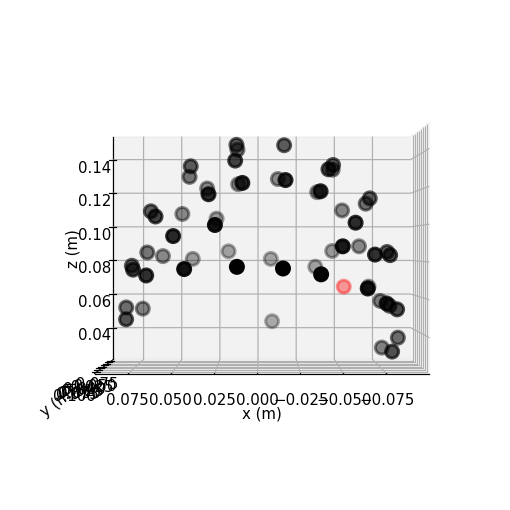

In [22]:
raw.plot_sensors(kind='3d',ch_type='eeg')

In [23]:
raw.info['bads']+=['EEG 051']

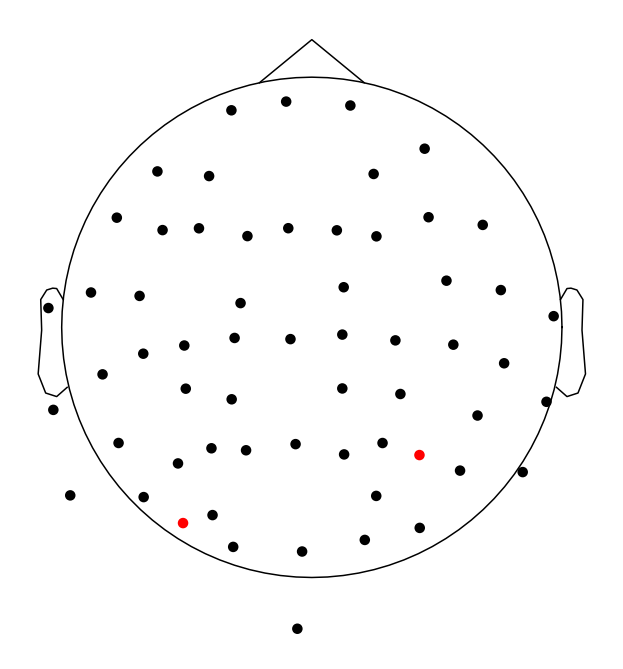

In [24]:
raw.plot_sensors(ch_type='eeg')

In [25]:
raw_eeg=raw.copy().pick_types(meg=False,eeg=True,exclude=[])
len(raw_eeg.ch_names)

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


60

In [26]:
raw_eeg.plot(events=events,event_id=event_id)

In [27]:
raw_meg=raw.copy().pick_types(meg=True,exclude=[])
raw_meg.plot(events=events,event_id=event_id)



In [28]:
raw_eeg_cropped=raw_eeg.copy().crop(tmax=100)
raw_eeg_cropped

<Raw | sample_audvis_raw.fif, 60 x 60062 (100.0 s), ~3.0 MB, data not loaded>

In [29]:
raw_eeg_cropped.times[-1]

99.99916914588277

In [30]:
raw_eeg_cropped.load_data()
raw_eeg_cropped_filtered=raw_eeg_cropped.filter(l_freq=0,h_freq=200)

Reading 0 ... 60061  =      0.000 ...    99.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 200.00 Hz
- Upper transition bandwidth: 50.00 Hz (-6 dB cutoff frequency: 225.00 Hz)
- Filter length: 41 samples (0.068 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


In [31]:
#raw_eeg_cropped.plot(events=events,event_id=event_id,title='only cropped')
raw_eeg_cropped_filtered.plot(events=events,event_id=event_id,title='only cropped and filtered')

#### Below code is for power spectral density to see how each frequency is distribution in the acquired data 

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)

raw_eeg_cropped.plot_psd(ax=ax[0], show=False)
raw_eeg_cropped_filtered.plot_psd(ax=ax[1], show=False)

ax[0].set_title('PSD before filtering')
ax[1].set_title('PSD after filtering')
ax[1].set_xlabel('Frequency (Hz)')
fig.set_tight_layout(True)
plt.show()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)


In [33]:
raw_eeg_cropped_filtered.save('eeg_croppped_filt_raw.fif')

Writing C:\Users\sathvik\Desktop\Computational Neuroscience\projects\files\assignment\eeg_croppped_filt_raw.fif
Closing C:\Users\sathvik\Desktop\Computational Neuroscience\projects\files\assignment\eeg_croppped_filt_raw.fif


C:\Python310\lib\site-packages\ipykernel\eventloops.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.exec_()


[done]
Channels marked as bad:
['EEG 053', 'EEG 051']
Channels marked as bad:
['MEG 2443']
Channels marked as bad:
['EEG 053', 'EEG 051']
